<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-first-two-data-files" data-toc-modified-id="Load-first-two-data-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load first two data files</a></span><ul class="toc-item"><li><span><a href="#Analysis-1:-What-is-the-relationship-between-the-number-of-claims-and-Outpatient-annual-Medicare-reimbursement-amount?" data-toc-modified-id="Analysis-1:-What-is-the-relationship-between-the-number-of-claims-and-Outpatient-annual-Medicare-reimbursement-amount?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Analysis 1: What is the relationship between the number of claims and Outpatient annual Medicare reimbursement amount?</a></span></li><li><span><a href="#Analysis-2:-Who-are-our-health-care-super-users?" data-toc-modified-id="Analysis-2:-Who-are-our-health-care-super-users?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analysis 2: Who are our health care super users?</a></span></li><li><span><a href="#Analysis-3:-Which-chronic-conditions-are-most-prevalent-among-super-users?" data-toc-modified-id="Analysis-3:-Which-chronic-conditions-are-most-prevalent-among-super-users?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Analysis 3: Which chronic conditions are most prevalent among super users?</a></span></li></ul></li><li><span><a href="#Prescription-Drug-Events" data-toc-modified-id="Prescription-Drug-Events-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prescription Drug Events</a></span><ul class="toc-item"><li><span><a href="#Analysis-4:-What-does-the-distribution-of-Rx-Claims-look-like?" data-toc-modified-id="Analysis-4:-What-does-the-distribution-of-Rx-Claims-look-like?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Analysis 4: What does the distribution of Rx Claims look like?</a></span></li><li><span><a href="#Analysis-5:-Does-our-Rx-data-help-us-better-predict-super-users?" data-toc-modified-id="Analysis-5:-Does-our-Rx-data-help-us-better-predict-super-users?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analysis 5: Does our Rx data help us better predict super users?</a></span></li><li><span><a href="#Analysis-6:-Does-gross-drug-amount-help-us-to-identify-super-users?" data-toc-modified-id="Analysis-6:-Does-gross-drug-amount-help-us-to-identify-super-users?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Analysis 6: Does gross drug amount help us to identify super users?</a></span></li><li><span><a href="#Analysis-7:-Correlation-matrix" data-toc-modified-id="Analysis-7:-Correlation-matrix-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Analysis 7: Correlation matrix</a></span></li><li><span><a href="#Analysis-8:-How-does-Rx-spend-differ-among-super-users-with-one-of-our-two-target-chronic-conditions?" data-toc-modified-id="Analysis-8:-How-does-Rx-spend-differ-among-super-users-with-one-of-our-two-target-chronic-conditions?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Analysis 8: How does Rx spend differ among super users with one of our two target chronic conditions?</a></span></li></ul></li></ul></div>

# Import libraries

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load first two data files

In [8]:
ben_summary_df = pd.read_excel(r"C:\Users\Corey Moser\Documents\Programming\Python\My_Projects\MorganStanley_Case_Study\BeneficiarySummary_2008.xlsx", 
                             dtype={'SP_STATE_CODE': object, 'BENE_COUNTY_CD': object})

<b>This file (of which the first 5 rows are displayed below) contains Medicare beneficiary summary data from 2008. <p>In addition to basic demographic data (de-identified of course), the file also contains flags indicating whether the beneficiary has been diagnosed with one of 11 chronic conditions (e.g. Alzheimer, heart failure, COPD, diabetes etc...). <p>Finally the file includes a variety of payment info including inpatient and outpatient reimbursement amounts as well as carrier, beneficiary and primary payer responsibilities.<b> 

In [207]:
#Show the first 5 rows of this file
ben_summary_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR,NumClaims,IsSuperUtilizer,NumRxEvents
0,00013D2EFD8E45D1,19230501,NaN,1,1,0,26,950,12,12,...,0,50,10,0,0,0,0,1.0,N,80.0
1,00016F745862898F,19430101,NaN,1,1,0,39,230,12,12,...,0,0,0,0,700,240,0,0.0,N,0.0
2,0001FDD721E223DC,19360901,NaN,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0.0,N,24.0
3,00021CA6FF03E670,19410601,NaN,1,5,0,6,290,0,0,...,0,0,0,0,0,0,0,0.0,N,0.0
4,00024B3D2352D2D0,19360801,NaN,1,1,0,52,590,12,12,...,0,30,40,0,220,80,0,1.0,N,0.0


<b>This second file contains 76 variables. Each record pertains to a synthetic outpatient claim and includes everything from  claim ID and physician present to diagnosis and revenue codes. <p>Crucially, this file contains a common column (`DESYNPUF_ID`) which allows us to tally the number of outpatient claims attributed to each member in our member summary file

In [12]:
claims_df = pd.read_excel(r"C:\Users\Corey Moser\Documents\Programming\Python\My_Projects\MorganStanley_Case_Study\Claims_2008.xlsx")

In [209]:
#Display the first 5 rows of the claims data file
claims_df.head(n=5)

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,Year,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,...,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,542192281063886,1,20080904,20080904,2600RA,2008,50,0,4.824842e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00024B3D2352D2D0,542242281386963,1,20080712,20080712,5200TV,2008,30,0,9.688809e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0002F28CE057345B,542162280904893,1,20080423,20080423,3902NU,2008,10,0,7.985077e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0002F28CE057345B,542192281407888,1,20080724,20080724,3902NU,2008,60,0,4.201755e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0002F28CE057345B,542342281460715,1,20080727,20080727,3900RQ,2008,200,0,7.535794e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b>Use the member ID column `DESYNPUF_ID`, which exists in both data sets, to get a count of how many times each member submitted a claim.</b>

In [31]:
z = claims_df['DESYNPUF_ID'].value_counts() #Get a count of each value in the claims_df data set
z1 = z.to_dict() #convert this to a dictonary format

<b>Let's make sure this worked by looking at the dictionary below. As we can see, our code worked. The member with ID 776E90FCC80C722F submitted 33 claims in 2008. This jives with what we see in Excel<b>

In [40]:
z1

{'776E90FCC80C722F': 33,
 'DA2C31A13EEA6994': 33,
 '66B11951279DB594': 32,
 'DB998B20F3833F82': 32,
 'D16705EB362C7513': 32,
 'AD5D4E087BF57C05': 31,
 'F1B31EAE9B8F41C9': 31,
 '6688888FAE4A668D': 31,
 '7819D8FA21478516': 31,
 '726A39EAD942B2D3': 31,
 '05EFEEAF964A120B': 31,
 '634C57A49CC11CD1': 31,
 'CFD2F732F669EC76': 30,
 '1B2D14B2CB66232D': 30,
 'D311079B5FCD6875': 30,
 '64487854DB0C3494': 30,
 '3A45A6144B5041E9': 29,
 '33415D5D1E294286': 29,
 '8A4D13BBC576671A': 29,
 '8FBF91DCA969CB07': 28,
 'FC5DEE9DE0645BFE': 28,
 '3A5888067B46751E': 27,
 '869B0CB48391E924': 27,
 'E72A02EAB2D5822C': 27,
 'EB047F0E1A8238C2': 27,
 '6F7709A7C0A7B87D': 27,
 '0A3A8621A038E50D': 27,
 '8425F52F9B797AD6': 27,
 '62DD5F2E993E0A38': 27,
 '8D5E7744B5C8A83F': 26,
 '0C8ADFC9429A259A': 26,
 '7DA1FA73A61DB3EE': 26,
 '940D7CAA5113E078': 26,
 'E2D39E24FCF427D5': 26,
 '917542EBEAE7CDAA': 26,
 '0B18667A4B56B862': 26,
 '5D259B167D19988B': 26,
 'AEAC4C1ECE3143A6': 26,
 '87E04B83CFF26BEF': 26,
 '96376191B64808AB': 26,


<b>The following code "maps" the key value pairs to our benefits summary dataframe. Applying the number of claims to the corresponding member ID and creating a new column, `NumClaims` with that value<b>

In [33]:
 ben_summary_df['NumClaims'] =  ben_summary_df['DESYNPUF_ID'].map(z1) 

In [210]:
 ben_summary_df[['DESYNPUF_ID','NumClaims']].head(n=10)

,DESYNPUF_ID,NumClaims
0,00013D2EFD8E45D1,1.0
1,00016F745862898F,0.0
2,0001FDD721E223DC,0.0
3,00021CA6FF03E670,0.0
4,00024B3D2352D2D0,1.0
5,0002DAE1C81CC70D,0.0
6,0002F28CE057345B,5.0
7,000308435E3E5B76,4.0
8,000345A39D4157C9,0.0
9,00036A21B65B0206,0.0


In [48]:
 ben_summary_df =  ben_summary_df.replace({
    'NumClaims': np.nan}, 0)

In [211]:
 ben_summary_df[['DESYNPUF_ID','NumClaims']].head(n=10)

,DESYNPUF_ID,NumClaims
0,00013D2EFD8E45D1,1.0
1,00016F745862898F,0.0
2,0001FDD721E223DC,0.0
3,00021CA6FF03E670,0.0
4,00024B3D2352D2D0,1.0
5,0002DAE1C81CC70D,0.0
6,0002F28CE057345B,5.0
7,000308435E3E5B76,4.0
8,000345A39D4157C9,0.0
9,00036A21B65B0206,0.0


## Analysis 1: What is the relationship between the number of claims and Outpatient annual Medicare reimbursement amount?

In [221]:
import statsmodels.formula.api as smf
model1 = smf.ols('MEDREIMB_OP ~ NumClaims', 
              data=ben_summary_df).fit()
model1_rsquare = model1.rsquared
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            MEDREIMB_OP   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                 7.399e+04
Date:                Fri, 24 May 2019   Prob (F-statistic):               0.00
Time:                        18:02:56   Log-Likelihood:            -1.0084e+06
No. Observations:              116352   AIC:                         2.017e+06
Df Residuals:                  116350   BIC:                         2.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -158.7680      5.020    -31.628      0.0

<b>An R<sup>2</sup> of .389 tells us that number of claims accounts for nearly 40% in the variance of reimbursement amounts. And as the scatter plot below further verifies, the two are positively coorelated. Every additional claim increases the reimbursement amount by ~$322.

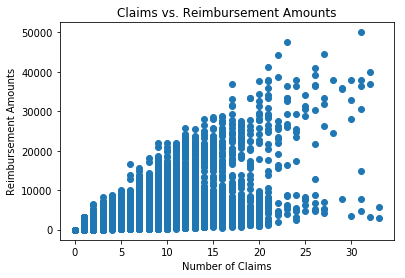

In [50]:
plt.scatter(ben_summary_df.NumClaims, ben_summary_df.MEDREIMB_OP)
plt.title("Claims vs. Reimbursement Amounts")
plt.xlabel("Number of Claims")
plt.ylabel("Reimbursement Amounts")
plt.show()

## Analysis 2: Who are our health care super users?

<b>The Pareto Principle, also known as the 80-20 rule, has shown up across an outstanding variety of fields. It says that a small number of things (people, products, actions) results in a disproportionate number of outcomes. The healthcare corrollary is simply that 80% of healthcare costs can be attributed to 20% of the patient population. <p>With this in mind, a logical place to look for a condition to target is to identify our so called "health care super users" and determine whether they suffer disproportionately from any chronic conditions</b>

<b>Let's get summary statistics on the number of claims column. Below, we can see that the average number of claims is 2.42 and 75% members submit four or fewer claims. What about our super users?</b>

In [51]:
ben_summary_df['NumClaims'].describe()

count    116352.000000
mean          2.422829
std           3.474703
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max          33.000000
Name: NumClaims, dtype: float64

[]

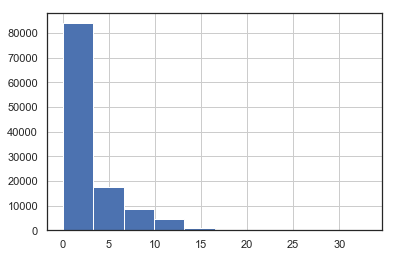

In [259]:
ben_summary_df['NumClaims'].hist().plot()

In [57]:
print("90% of users have", ben_summary_df['NumClaims'].quantile(0.90),"or fewer claims")
print("99% of users have", ben_summary_df['NumClaims'].quantile(0.99),"or fewer claims")

90% of users have 7.0 or fewer claims
99% of users have 14.0 or fewer claims


In [212]:
print("This means that", ben_summary_df[ben_summary_df['NumClaims'] > 7].count()[0],"users have more than 7 claims")
print("And", ben_summary_df[ben_summary_df['NumClaims'] > 14].count()[0],"users have more than 14 claims. Let's call these our super users.")

This means that 11005 users have more than 7 claims
And 1134 users have more than 14 claims. Let's call these our super users.


<b>Create a new column called `IsSuperUtilizer`. If the value in `NumClaims` is greater than 14 than member receives a 'Y' to indicate Super User status. Else, an 'N'. 

In [68]:
#This function determines whether a value is greater than 14 and returns a Y if True.
def is_SuperUtilizer(row):
    if row['NumClaims'] > 14:
        val = 'Y'
    else:
        val = 'N'
    return val

In [69]:
#Function is applied column wise and the value is placed in a new column
ben_summary_df['IsSuperUtilizer'] = ben_summary_df.apply(is_SuperUtilizer, axis=1)

In [70]:
#This shows the function worked as intended
ben_summary_df[['DESYNPUF_ID','NumClaims','IsSuperUtilizer']].head(n=20)

,DESYNPUF_ID,NumClaims,IsSuperUtilizer
0,00013D2EFD8E45D1,1.0,N
1,00016F745862898F,0.0,N
2,0001FDD721E223DC,0.0,N
3,00021CA6FF03E670,0.0,N
4,00024B3D2352D2D0,1.0,N
5,0002DAE1C81CC70D,0.0,N
6,0002F28CE057345B,5.0,N
7,000308435E3E5B76,4.0,N
8,000345A39D4157C9,0.0,N
9,00036A21B65B0206,0.0,N


## Analysis 3: Which chronic conditions are most prevalent among super users?

<b>Now that we know who are super users are, let's see how often they appear to have a chronic condition. The screenshot below shows how these conditions are coded within our data so we know what columns to investigate</b>

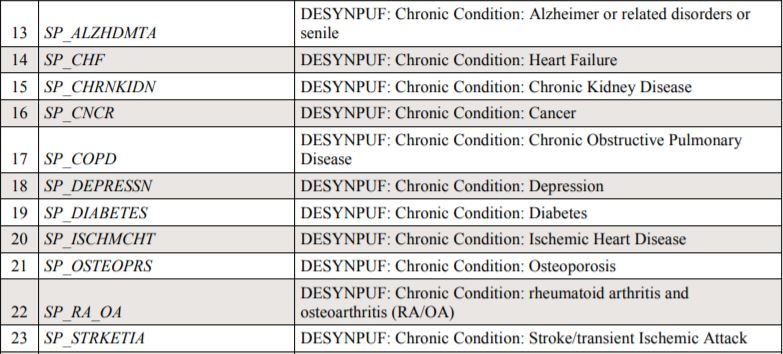

In [95]:
from IPython.display import Image
Image(filename=r'C:\Users\Corey Moser\Documents\Programming\Python\My_Projects\MorganStanley_Case_Study\CMS_MedicalCodes.JPG')

In [214]:
#Grab the columns above from our data
ben_summary_df.columns[12:23]

Index(['SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD',
       'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA',
       'SP_STRKETIA'],
      dtype='object')

In [215]:
#Assign these to a variable so we can access them easily. Will use this momentarily
chronic_conditions = ben_summary_df.columns[12:23]
chronic_conditions

Index(['SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD',
       'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA',
       'SP_STRKETIA'],
      dtype='object')

<b>This pivot table shows us how diabetes affects our population and whether those affected are healthcare super users or not. Below we can see that 44,060 employees of 116,352 have diabetes. More importantly, of our super users 1,008 out of 1,134 have it; this is a huge percentage of that population.</b>

In [99]:
ben_summary_df.pivot_table(index='SP_DIABETES', 
                           columns='IsSuperUtilizer', 
                           values='DESYNPUF_ID', 
                           aggfunc='count', 
                           margins=True)

IsSuperUtilizer,N,Y,All
SP_DIABETES,,,
1,43052,1008,44060
2,72166,126,72292
All,115218,1134,116352


<b>Lets' create a series of pivot tables. For each, we'll show how each of our chronic conditions affect differents portions of our patient population and how prevalent our super users are among them

In [119]:
for i in chronic_conditions:
    print(ben_summary_df.pivot_table(index=i, 
                           columns='IsSuperUtilizer', 
                           values='DESYNPUF_ID', 
                           aggfunc='count', 
                           margins=True))
    print("")
    print("---------------")
    print("")

IsSuperUtilizer       N     Y     All
SP_ALZHDMTA                          
1                 21800   610   22410
2                 93418   524   93942
All              115218  1134  116352

---------------

IsSuperUtilizer       N     Y     All
SP_CHF                               
1                 32301   854   33155
2                 82917   280   83197
All              115218  1134  116352

---------------

IsSuperUtilizer       N     Y     All
SP_CHRNKIDN                          
1                 17985   701   18686
2                 97233   433   97666
All              115218  1134  116352

---------------

IsSuperUtilizer       N     Y     All
SP_CNCR                              
1                  7183   232    7415
2                108035   902  108937
All              115218  1134  116352

---------------

IsSuperUtilizer       N     Y     All
SP_COPD                              
1                 15208   535   15743
2                100010   599  100609
All             

<b> Of our 11 chronic diseases, diabetes and ischemic heart disease are most prevalent, affecting ~89% of the super-user population. Said another way, having one of these two conditions makes someone much more likely to use health care services. It follow then that we can decrease healthcare usage by targeting the factors that lead to these conditions.</b>

In [263]:
ben_summary_df.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR', 'NumClaims',
       'IsSuperUtilizer', 'NumRxEvents'],
      dtype='object')

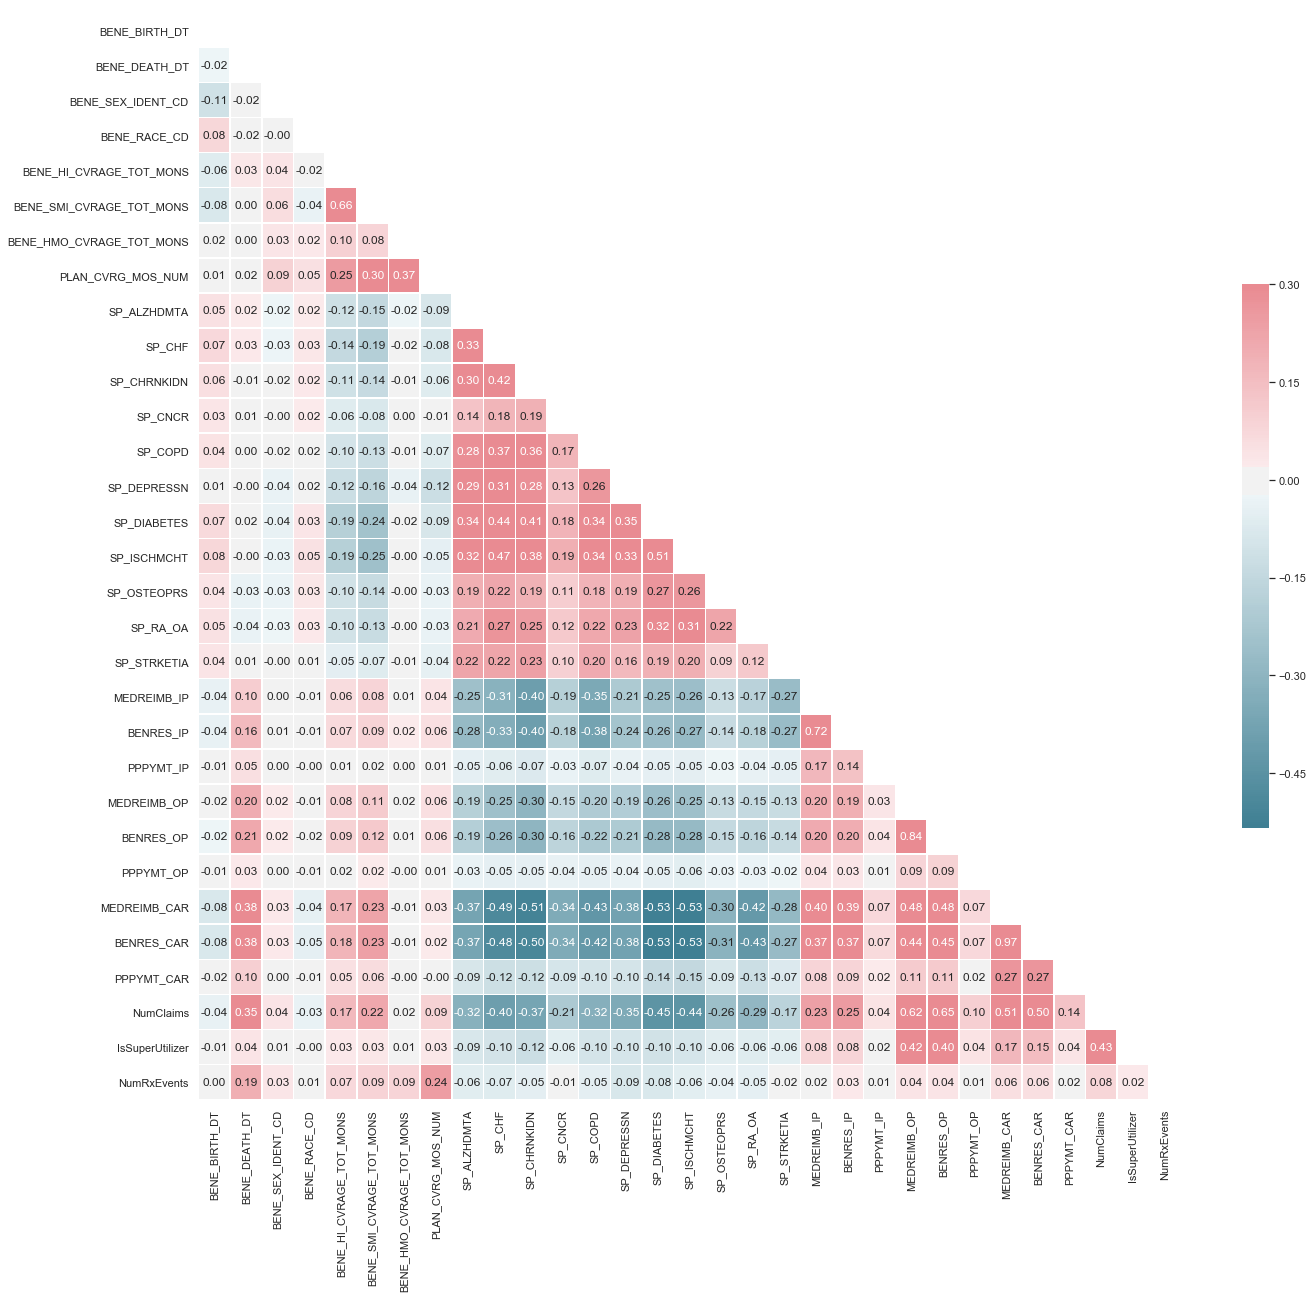

In [268]:
sns.set(style="white")
corr = ben_summary_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=False, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})

In [266]:
ben_summary_df['IsSuperUtilizer'] = ben_summary_df['IsSuperUtilizer'].map({'Y': 1, 'N': 0})

In [267]:
ben_summary_df['IsSuperUtilizer'].corr(ben_summary_df['MEDREIMB_OP'])

0.4195466193679413

# Prescription Drug Events

<b>We can also use prescription drug event data, which also identifies members by the same `DESYNPUF_ID` column to learn more about Rx usage</b>

In [216]:
#load the rx data set
rx_df = pd.read_csv(r"C:\Users\Corey Moser\Documents\Programming\Python\My_Projects\MorganStanley_Case_Study\DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_1.csv")
rx_df.head()

C:\Users\Corey Moser\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DESYNPUF_ID,PDE_ID,SRVC_DT,year,PROD_SRVC_ID,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,PTNT_PAY_AMT,TOT_RX_CST_AMT
0,00013D2EFD8E45D1,2.336640e+14,20080103,2008,247037252,30,20,10,120
1,00013D2EFD8E45D1,2.336440e+14,20080105,2008,223039502,10,10,0,0
2,00013D2EFD8E45D1,2.339740e+14,20080109,2008,364724812,120,30,10,110
3,00013D2EFD8E45D1,2.335740e+14,20080123,2008,179180672,30,30,0,240
4,00013D2EFD8E45D1,2.330240e+14,20080124,2008,58016005300,30,30,70,70


<b>Similar to what we did earlier, we can get a count of how many time each user in our original file appears in the new data set. Essentially, how many prescription drug events did he/she have in 2008?

In [125]:
rx_counts = rx_df['DESYNPUF_ID'].value_counts() #Get a count of each value in the claims_df data set
rx_counts_dict = rx_counts.to_dict() #convert this to a dictonary format

In [126]:
 ben_summary_df['NumRxEvents'] =  ben_summary_df['DESYNPUF_ID'].map(rx_counts_dict) 

In [127]:
rx_counts_dict

{'29A392121473E854': 144,
 '01854EABDA796A16': 130,
 '04CD7DF7BB1A5968': 128,
 '1BA2FE3C2B0F337E': 128,
 '213DDA8B2B5FFDBE': 128,
 '15BFA405D4FD1BCA': 126,
 '1F006C9F51F91886': 125,
 '15F6460FD971421B': 125,
 '122426591B38C914': 123,
 '1CDEF1BDD7D4D762': 121,
 '03D262AF75723EF7': 121,
 '15B431071C6E86C3': 121,
 '2B8E42800A551CB3': 120,
 '0CB1198EA8E2BF61': 120,
 '06CB10C7F9FCA4B6': 120,
 '1925356D9D295435': 119,
 '03AEAF24B59C6DE2': 118,
 '1291D47E789C3B9E': 117,
 '1581BF3D400986E1': 117,
 '127D4F0F5FB6D47E': 117,
 '1D11647D7F72E147': 117,
 '1C0EB49410733487': 116,
 '19EF18AAB8CDB113': 115,
 '15A1772F19C46047': 115,
 '08F0F460B4B438F1': 114,
 '2C0387F668363968': 114,
 '125B6DADFB168727': 114,
 '131B82BBD63FC93D': 114,
 '13DD241F82149FE7': 114,
 '01187BA8BCA938C9': 113,
 '05E19681DB017DD2': 113,
 '2C233127D64173B2': 113,
 '1B6E6202525831ED': 113,
 '06EA4E4C8AE7F9B7': 113,
 '059AFEC55F160076': 112,
 '02DC85598867F4E6': 112,
 '1A7BEF2868412C22': 111,
 '0A7822079EF9F8D4': 111,
 '0852B632C9

In [129]:
#We need to recode employees who did not have an Rx claim. Numpy uses NaN (not a number) by default. 
# The following code changes this to 0.
ben_summary_df =  ben_summary_df.replace({
    'NumRxEvents': np.nan}, 0)

In [130]:
ben_summary_df[['DESYNPUF_ID','NumRxEvents']].head(n=20)

,DESYNPUF_ID,NumRxEvents
0,00013D2EFD8E45D1,80.0
1,00016F745862898F,0.0
2,0001FDD721E223DC,24.0
3,00021CA6FF03E670,0.0
4,00024B3D2352D2D0,0.0
5,0002DAE1C81CC70D,0.0
6,0002F28CE057345B,0.0
7,000308435E3E5B76,0.0
8,000345A39D4157C9,0.0
9,00036A21B65B0206,37.0


In [132]:
ben_summary_df['NumRxEvents'].describe()

count    116352.000000
mean          3.244723
std          11.403043
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         144.000000
Name: NumRxEvents, dtype: float64

## Analysis 4: What does the distribution of Rx Claims look like?

In [137]:
ben_summary_df['NumRxEvents'].value_counts().sort_index()

0.0      102498
1.0         762
2.0         597
3.0         422
4.0         315
5.0         230
6.0         197
7.0         206
8.0         203
9.0         210
10.0        212
11.0        243
12.0        248
13.0        269
14.0        248
15.0        245
16.0        263
17.0        243
18.0        266
19.0        284
20.0        275
21.0        303
22.0        292
23.0        264
24.0        247
25.0        259
26.0        299
27.0        255
28.0        268
29.0        258
          ...  
98.0          7
99.0          9
100.0         5
101.0         5
102.0         4
103.0        11
104.0         6
105.0         2
106.0         7
107.0        11
108.0         9
109.0         3
110.0         2
111.0         8
112.0         2
113.0         5
114.0         5
115.0         2
116.0         1
117.0         4
118.0         1
119.0         1
120.0         3
121.0         3
123.0         1
125.0         2
126.0         1
128.0         3
130.0         1
144.0         1
Name: NumRxEvents, Lengt

In [249]:
print(ben_summary_df['NumRxEvents'].value_counts().sort_index()[0],"members had no Rx events while", ben_summary_df['NumRxEvents'].value_counts().sort_index()[1:].sum(), "had one or more Rx events")

102498 members had no Rx events while 13854 had one or more Rx events


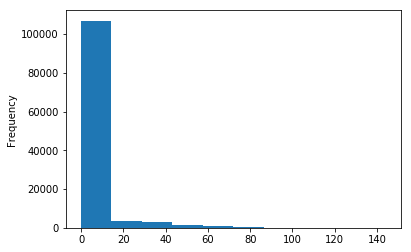

In [134]:
ben_summary_df['NumRxEvents'].plot.hist()

<b> Rx claim events are definitely right skewed. The vast majority of users had none while a few had over 100. The average was 3.24

## Analysis 5: Does our Rx data help us better predict super users?

In [143]:
ben_summary_df.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR', 'NumClaims',
       'IsSuperUtilizer', 'NumRxEvents'],
      dtype='object')

<b> Let's create a new dataframe which will be a smaller version of our original data. The columns we'll use include:
    <ul>
    <li>DESYNPUF_ID = member ID</li>
    <li>NumRxEvents = # of prescription drug events for each member</li>
    <li>SP_ISCHMCHT	 = Does this person have ischemic heart disease (yes/no)</li>
    <li>SP_DIABETES	 = Does this person have diabetes (yes/no)</li>
    <li>IsSuperUtilizer	 = Is this person a super utilizer (yes/no)</li>
    </ul>

In [228]:
df2 = ben_summary_df[['DESYNPUF_ID','NumRxEvents','SP_ISCHMCHT','SP_DIABETES','IsSuperUtilizer']].copy()

In [229]:
df2.head(n=10)

,DESYNPUF_ID,NumRxEvents,SP_ISCHMCHT,SP_DIABETES,IsSuperUtilizer
0,00013D2EFD8E45D1,80.0,2,2,N
1,00016F745862898F,0.0,2,2,N
2,0001FDD721E223DC,24.0,2,2,N
3,00021CA6FF03E670,0.0,2,2,N
4,00024B3D2352D2D0,0.0,2,2,N
5,0002DAE1C81CC70D,0.0,2,2,N
6,0002F28CE057345B,0.0,1,1,N
7,000308435E3E5B76,0.0,2,2,N
8,000345A39D4157C9,0.0,2,2,N
9,00036A21B65B0206,37.0,2,2,N


In [230]:
#recode all 2s to 0. We want 1 to = yes (person has disease) and 0 = no (person does not)
df2['SP_ISCHMCHT'] = df2['SP_ISCHMCHT'].replace({
    2: 0})

In [231]:
df2.head(n=10)

,DESYNPUF_ID,NumRxEvents,SP_ISCHMCHT,SP_DIABETES,IsSuperUtilizer
0,00013D2EFD8E45D1,80.0,0,2,N
1,00016F745862898F,0.0,0,2,N
2,0001FDD721E223DC,24.0,0,2,N
3,00021CA6FF03E670,0.0,0,2,N
4,00024B3D2352D2D0,0.0,0,2,N
5,0002DAE1C81CC70D,0.0,0,2,N
6,0002F28CE057345B,0.0,1,1,N
7,000308435E3E5B76,0.0,0,2,N
8,000345A39D4157C9,0.0,0,2,N
9,00036A21B65B0206,37.0,0,2,N


In [232]:
#recode all 2s to 0. We want 1 to = yes (person has disease) and 0 = no (person does not)
df2['SP_DIABETES'] = df2['SP_DIABETES'].replace({
    2: 0})
df2.head(n=10)

,DESYNPUF_ID,NumRxEvents,SP_ISCHMCHT,SP_DIABETES,IsSuperUtilizer
0,00013D2EFD8E45D1,80.0,0,0,N
1,00016F745862898F,0.0,0,0,N
2,0001FDD721E223DC,24.0,0,0,N
3,00021CA6FF03E670,0.0,0,0,N
4,00024B3D2352D2D0,0.0,0,0,N
5,0002DAE1C81CC70D,0.0,0,0,N
6,0002F28CE057345B,0.0,1,1,N
7,000308435E3E5B76,0.0,0,0,N
8,000345A39D4157C9,0.0,0,0,N
9,00036A21B65B0206,37.0,0,0,N


In [233]:
#recode all Y and N to 1 and 0 respectively
df2['IsSuperUtilizer'] = df2['IsSuperUtilizer'].replace({
    'N': 0,
'Y':1})

,DESYNPUF_ID,NumRxEvents,SP_ISCHMCHT,SP_DIABETES,IsSuperUtilizer
0,00013D2EFD8E45D1,80.0,0,0,0
1,00016F745862898F,0.0,0,0,0
2,0001FDD721E223DC,24.0,0,0,0
3,00021CA6FF03E670,0.0,0,0,0
4,00024B3D2352D2D0,0.0,0,0,0
5,0002DAE1C81CC70D,0.0,0,0,0
6,0002F28CE057345B,0.0,1,1,0
7,000308435E3E5B76,0.0,0,0,0
8,000345A39D4157C9,0.0,0,0,0
9,00036A21B65B0206,37.0,0,0,0


In [235]:
model2 = smf.logit('IsSuperUtilizer ~ NumRxEvents + SP_ISCHMCHT + SP_DIABETES', 
              data=df2).fit()
model2_rsquare = model2.prsquared
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.047749
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:        IsSuperUtilizer   No. Observations:               116352
Model:                          Logit   Df Residuals:                   116348
Method:                           MLE   Df Model:                            3
Date:                Fri, 24 May 2019   Pseudo R-squ.:                  0.1292
Time:                        18:12:27   Log-Likelihood:                -5555.7
converged:                       True   LL-Null:                       -6379.9
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.0133      0.109    -64.536      0.000      -7.226      -6.800
NumRxEvents     0.0076   

<b> As expected, those classified as having one of our two chronic illnesses increases the likelihood of that member being a health care super user. Surprisingly, the number of Rx events does not</b> 

## Analysis 6: Does gross drug amount help us to identify super users?

<b> Maybe instead of Rx events we want to find the gross drug cost? This might help us dicern if one condition is more expensive to treat than another 

In [170]:
rx_df.columns

Index(['DESYNPUF_ID', 'PDE_ID', 'SRVC_DT', 'year', 'PROD_SRVC_ID',
       'QTY_DSPNSD_NUM', 'DAYS_SUPLY_NUM', 'PTNT_PAY_AMT', 'TOT_RX_CST_AMT'],
      dtype='object')

<b>From our Rx dataset, we can group by member ID (`DESYNPUF_ID`) and sum on `TOT_RX_CST_AMT`, defined as the gross drug cost. I believe this is a better representation of the cost of a patient's Rx spend rather than the true amount they paid, which is influenced by copayments, coinsurance, deductibles, rebates etc..

In [179]:
#group by member id, sum the gross drug amount and display the first 20 results
rx_df.groupby('DESYNPUF_ID')['TOT_RX_CST_AMT'].sum()[:20]

DESYNPUF_ID
00013D2EFD8E45D1    6640
0001FDD721E223DC    1030
00036A21B65B0206     760
000489E7EAAD463F    1420
00048EF1F4791C68    1350
0004F0ABD505251D    2910
0007F12A492FD25D     630
000A005BA0BED3EA     180
000C7486B11E7030     770
00108066CA1FACCE    4410
0011714C14B52EEB    1130
0011CB1FE23E91AF    4080
0012AFEEC379A69D    3430
00131C35661B2926     270
00139C345A104F72    1130
0013E139F1F37264     330
00151A878F9A2C0D     880
00157F1570C74E09    4080
00164E3EFB1B5604    1050
0016D2185D29BC11     190
Name: TOT_RX_CST_AMT, dtype: int64

In [176]:
rx_df.groupby('DESYNPUF_ID')['TOT_RX_CST_AMT'].sum().describe()

count    13868.000000
mean      1675.186761
std       1751.246494
min          0.000000
25%        360.000000
50%       1100.000000
75%       2382.500000
max      13330.000000
Name: TOT_RX_CST_AMT, dtype: float64

<b> The average Rx cost among employees with at least one Rx event was $1,675</b>

In [250]:
#Add each employee's Rx spend to our df2 data frame
rx_spend = rx_df.groupby('DESYNPUF_ID')['TOT_RX_CST_AMT'].sum()
rx_spend_dict = rx_spend.to_dict()

In [251]:
df2['RxSpend'] = df2['DESYNPUF_ID'].map(rx_spend_dict)

In [252]:
df2.head()

,DESYNPUF_ID,NumRxEvents,SP_ISCHMCHT,SP_DIABETES,IsSuperUtilizer,RxSpend
0,00013D2EFD8E45D1,80.0,0,0,0,6640.0
1,00016F745862898F,0.0,0,0,0,NaN
2,0001FDD721E223DC,24.0,0,0,0,1030.0
3,00021CA6FF03E670,0.0,0,0,0,NaN
4,00024B3D2352D2D0,0.0,0,0,0,NaN


In [187]:
df2 = df2.replace({
    'RxSpend':np.NaN}, 0)

In [189]:
df2.head(n=5)

,DESYNPUF_ID,NumRxEvents,SP_ISCHMCHT,SP_DIABETES,IsSuperUtilizer,RxSpend
0,00013D2EFD8E45D1,80.0,0,0,0,6640.0
1,00016F745862898F,0.0,0,0,0,0.0
2,0001FDD721E223DC,24.0,0,0,0,1030.0
3,00021CA6FF03E670,0.0,0,0,0,0.0
4,00024B3D2352D2D0,0.0,0,0,0,0.0


In [253]:
model3 = smf.logit('IsSuperUtilizer ~ RxSpend', 
              data=df2).fit()
model3_rsquare = model5.prsquared
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.062108
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:        IsSuperUtilizer   No. Observations:                13854
Model:                          Logit   Df Residuals:                    13852
Method:                           MLE   Df Model:                            1
Date:                Fri, 24 May 2019   Pseudo R-squ.:                 0.04335
Time:                        18:38:05   Log-Likelihood:                -860.45
converged:                       True   LL-Null:                       -899.44
                                        LLR p-value:                 1.039e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0863      0.120    -42.403      0.000      -5.321      -4.851
RxSpend        0.0003   3.02e

## Analysis 7: Correlation matrix

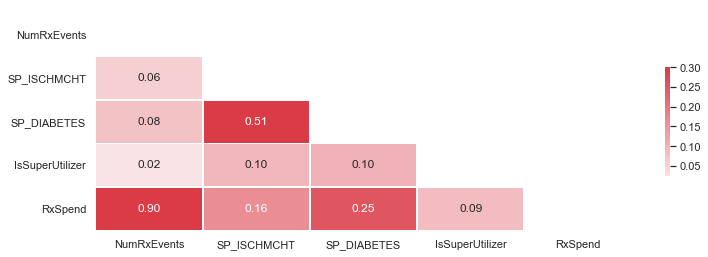

In [254]:
sns.set(style="white")
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=False, linewidths=.5, annot=True, fmt=".2f", cbar_kws={"shrink": .5})

<b>Neither Rx spend nor NumRxEvents has a very high correlation with super users. Let's try one more analysis looking at the average Rx spend betweent the two  groups

## Analysis 8: How does Rx spend differ among super users with one of our two target chronic conditions? 

In [258]:
df2.pivot_table(index='SP_DIABETES', 
                           columns='IsSuperUtilizer', 
                           values='RxSpend', 
                           aggfunc='mean', 
                           margins=True)

IsSuperUtilizer,0,1,All
SP_DIABETES,,,
0,1293.061861,2671.250000,1295.806572
1,2174.151675,3113.066667,2198.350515
All,1658.036967,3070.481928,1674.961022


In [257]:
df2.pivot_table(index='SP_ISCHMCHT', 
                           columns='IsSuperUtilizer', 
                           values='RxSpend', 
                           aggfunc='mean', 
                           margins=True)

IsSuperUtilizer,0,1,All
SP_ISCHMCHT,,,
0,1407.290297,2799.500000,1411.017267
1,1957.590188,3107.602740,1983.894720
All,1658.036967,3070.481928,1674.961022


<b>As expected Rx spend is higher both for those with and without our target conditions and higher still among the super users</b>